In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
features.dtypes

SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_id              object
spotify_track_preview_url     object
spotify_track_duration_ms    float64
spotify_track_explicit       float64
spotify_track_album           object
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
spotify_track_popularity     float64
dtype: object

In [4]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [5]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [6]:
bb100.dtypes

url                               object
WeekID                    datetime64[ns]
Week Position                      int64
Song                              object
Performer                         object
SongID                            object
Instance                           int64
Previous Week Position           float64
Peak Position                      int64
Weeks on Chart                     int64
dtype: object

In [7]:
def one_feature_over_time(feature_string, title_string, y_label_string, x_label_string = "Year"):
    
    bb100 = pd.read_csv('Hot Stuff.csv')
    bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
    keep = ['SongID', 'WeekID']
    bb100a = bb100[keep]
    
    features = pd.read_excel('Hot 100 Audio Features.xlsx')
    features_keep = ['SongID', feature_string]
    features_a = features[features_keep]
    
    bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')
    
    bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean().plot(legend=False)
    
    plt.title(title_string, fontsize=20)
    plt.xlabel(x_label_string, fontsize=15)
    plt.ylabel(y_label_string, fontsize=15)
    plt.show();

## Group A: Informative Trends

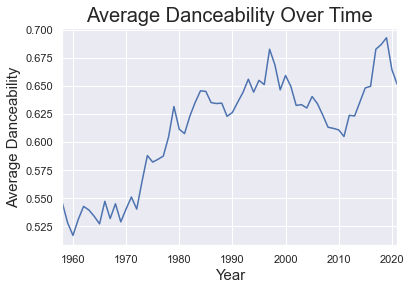

In [8]:
one_feature_over_time('danceability', 'Average Danceability Over Time', 'Average Danceability')

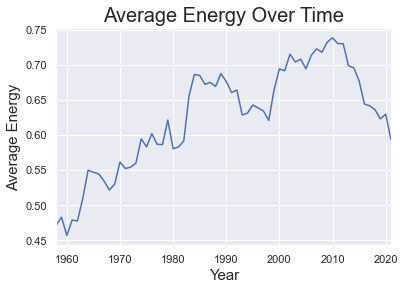

In [9]:
one_feature_over_time('energy', 'Average Energy Over Time', 'Average Energy')

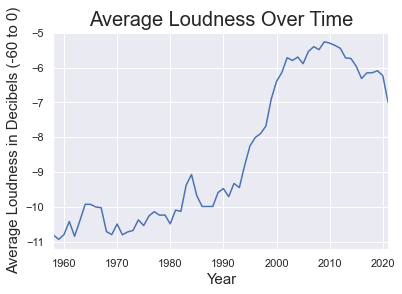

In [10]:
one_feature_over_time('loudness', 'Average Loudness Over Time', 'Average Loudness in Decibels (-60 to 0)')

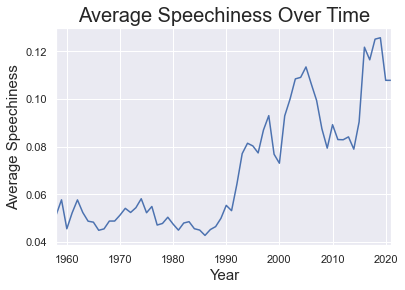

In [11]:
one_feature_over_time('speechiness', 'Average Speechiness Over Time', 'Average Speechiness')

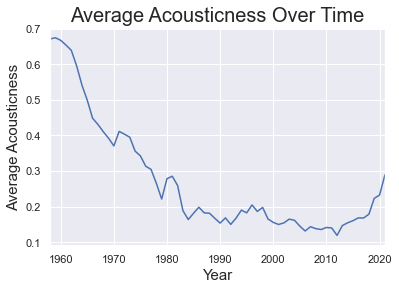

In [12]:
one_feature_over_time('acousticness', 'Average Acousticness Over Time', 'Average Acousticness')

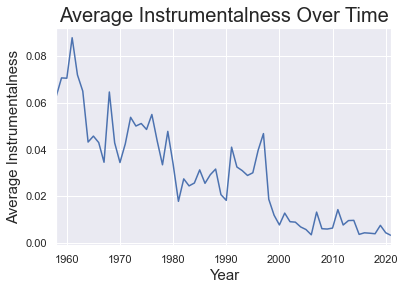

In [13]:
one_feature_over_time('instrumentalness', 'Average Instrumentalness Over Time', 'Average Instrumentalness')

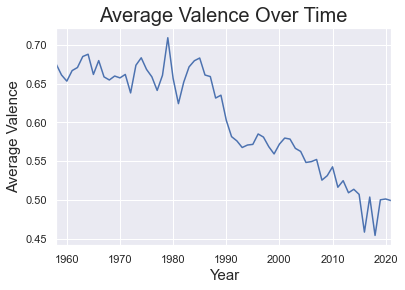

In [14]:
one_feature_over_time('valence', 'Average Valence Over Time', 'Average Valence')

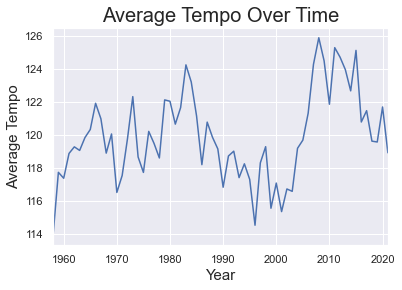

In [15]:
one_feature_over_time('tempo', 'Average Tempo Over Time', 'Average Tempo')

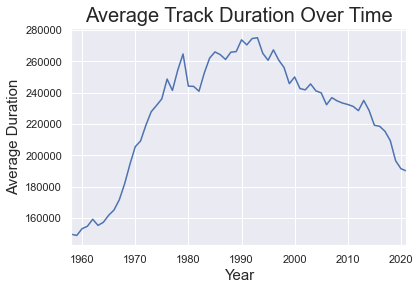

In [16]:
one_feature_over_time('spotify_track_duration_ms', 'Average Track Duration Over Time', 'Average Duration')

In [17]:
def two_feat_over_time(feature_string1, feature_string2, title_string = None):
    
    bb100 = pd.read_csv('Hot Stuff.csv')
    bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
    keep = ['SongID', 'WeekID']
    bb100a = bb100[keep]
    
    features = pd.read_excel('Hot 100 Audio Features.xlsx')
    features_keep = ['SongID', feature_string1, feature_string2]
    features_a = features[features_keep]
    
    bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')

    fig, ax1 = plt.subplots()
    fig.suptitle(title_string, fontsize=18)
    ax1.plot(bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()[feature_string1],
            color='tab:red', label=feature_string1)
    ax1.set_xlabel('Year', fontsize=15)
    ax1.set_ylabel('Average ' + feature_string1.capitalize(), color='tab:red', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='tab:red')
    #ax1.legend()
    
    ax2=ax1.twinx()
    ax2.plot(bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()[feature_string2],
            color='tab:blue', label=feature_string2)
    ax2.set_ylabel('Average ' + feature_string2.capitalize(), color='tab:blue', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    #ax2.legend()


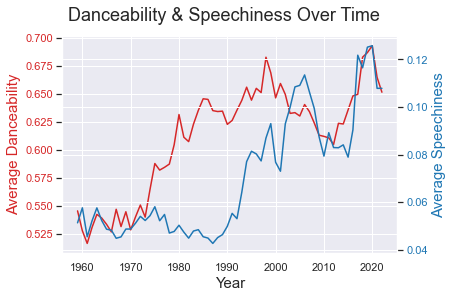

In [18]:
two_feat_over_time('danceability', 'speechiness', 'Danceability & Speechiness Over Time')

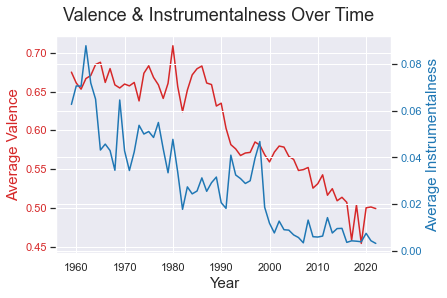

In [19]:
two_feat_over_time('valence', 'instrumentalness', 'Valence & Instrumentalness Over Time')

## Group B: Less Illustrative

In [20]:
features_over_time('key', 'Average Key Over Time', 'Average Key')

NameError: name 'features_over_time' is not defined

In [ ]:
features_over_time('mode', 'Average Mode Over Time', 'Average Mode')

In [ ]:
features_over_time('liveness', 'Average Liveness Over Time', 'Average Liveness')

In [ ]:
features_over_time('time_signature', 'Average Time Signature Over Time', 'Average Time Signature')

In [ ]:
features_over_time('spotify_track_popularity', 'Average Spotify Popularity Over Time', 'Average Popularity')